# Lan truyền thuận, lan truyền ngược và đồ thị tính toán




## Lý thuyết


### Problem Statement

Trong học sâu (deep learning), một bài toán quan trọng là **huấn luyện mạng neural** sao cho nó có thể học được các mẫu (patterns) từ dữ liệu và tổng quát hóa tốt khi gặp dữ liệu mới. Quá trình huấn luyện này yêu cầu **điều chỉnh trọng số và bias** của mạng để **giảm sai số (loss)** giữa đầu ra mô hình và nhãn thật sự.

Một vấn đề cốt lõi là: **Làm sao để tính được độ dốc (gradient) của hàm mất mát theo từng tham số trong một mạng có nhiều lớp?**  
=> **Backpropagation** ra đời để giải quyết chính xác bài toán này.

---


### How CS Problems are Solved using Backpropagation

Trong khoa học máy tính, đặc biệt trong lĩnh vực trí tuệ nhân tạo và machine learning, backpropagation giúp giải quyết nhiều bài toán bằng cách:

- Cho phép **huấn luyện mạng nhiều lớp (deep neural networks)** hiệu quả.
- Cung cấp **đạo hàm chính xác và nhanh** thông qua Chain Rule.
- Làm nền tảng cho các **framework học sâu** như PyTorch, TensorFlow.

Nhờ backpropagation, các mô hình có thể **liên tục cải thiện hiệu năng** qua các vòng huấn luyện, và học từ dữ liệu thực tế theo cách có thể mở rộng (scalable).


### 5.3.1 Lan truyền thuận



### 5.3.2 Đồ thị tính toán của lan truyền thuận

Dưới đây là đồ thị tính toán của mạng nơ-ron đã được đề cập ở trên
![Đồ thị tính toán](https://d2l.aivivn.com/_images/forward.svg)

### 5.3.3 Lan truyền Ngược




## Bài tập


### 1. Assume that the inputs $\mathbf{X}$ to some scalar function $f$ are $n \times m$ matrices. What is the dimensionality of the gradient of $f$ with respect to $\mathbf{X}$?


Miền gradient của hàm $f$ sẽ có miền giống với miền của ma trận X, tức là $\mathbb{R}^{n \times m}$:

$
\frac{\partial f}{\partial \mathbf{X}} \in \mathbb{R}^{n \times m}.
$

Với mỗi phần tử của ma trận, gradient sẽ là:
$
\left[ \frac{\partial f}{\partial X} \right]_{ij} = \frac{\partial f}{\partial X_{ij}}
$

$
\frac{\partial f}{\partial \mathbf{X}} =
\begin{bmatrix}
\frac{\partial f}{\partial x_{11}} & \frac{\partial f}{\partial x_{21}} & \cdots & \frac{\partial f}{\partial x_{n1}} \\
\frac{\partial f}{\partial x_{12}} & \frac{\partial f}{\partial x_{22}} & \cdots & \frac{\partial f}{\partial x_{n2}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f}{\partial x_{1m}} & \frac{\partial f}{\partial x_{2m}} & \cdots & \frac{\partial f}{\partial x_{nm}}
\end{bmatrix}
$




### 2. Add a bias to the hidden layer of the model described in this section (you do not need to include bias in the regularization term).
1. Draw the corresponding computational graph.
2. Derive the forward and backward propagation equations.


Dựa theo đồ thị tính toán ở phần lý thuyết, ta thêm bias vào hidden layer, ta có thể biểu diễn lại công thức tính toán của hidden layer như sau:

Lan truyền xuôi

Input to hidden layer:
$$
\mathbf{z} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b_{1}}
$$

Hidden layer to activation:
$$
\mathbf{h} = \phi(\mathbf{z})
$$

Output layer:
$$
\mathbf{o} = \mathbf{W}^{(2)} \mathbf{h} + \mathbf{b_{2}}
$$

Hàm mất mát:
$$
\mathcal{L}  = l(o,y)
$$

Hàm mục tiêu:
$$
\mathcal{J} = \mathcal{L} + \frac{\lambda}{2}(||W^{(1)}||_F^2+||W^{(2)}||_F^2)
$$


![Đồ thị tính toán](./images/computational%20graph.png)

Lan truyền ngược:

Gradient của hàm mất mát dựa theo output: 
$\frac{\partial \mathcal{L}}{\partial o} = o - y $


$\frac{\partial o}{\partial h} = W^{(2)} $





### 🧮 Đạo hàm lan truyền ngược

**1. Gradient theo output lớp cuối:**
$
\frac{\partial J}{\partial \mathbf{o}} = \frac{\partial L}{\partial \mathbf{o}}
$

**2. Gradient theo trọng số lớp 2:**
$
\frac{\partial J}{\partial \mathbf{W}^{(2)}} = \frac{\partial J}{\partial \mathbf{o}} \cdot \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}
$

**3. Gradient theo bias lớp 2:**
$
\frac{\partial J}{\partial \mathbf{b}^{(2)}} = \frac{\partial \mathcal{L}}{\partial \mathbf{o}}
$

**4. Gradient theo output lớp ẩn:**
$
\frac{\partial J}{\partial \mathbf{h}} = \mathbf{W}^{(2)\top} \cdot \frac{\partial J}{\partial \mathbf{o}}
$

**5. Gradient trước kích hoạt lớp ẩn (sau linear):**
$
\frac{\partial J}{\partial \mathbf{z}} = \frac{\partial J}{\partial \mathbf{h}} \odot \phi'(\mathbf{z})
$

**6. Gradient theo trọng số lớp 1:**
$
\frac{\partial J}{\partial \mathbf{W}^{(1)}} = \frac{\partial J}{\partial \mathbf{z}^{(1)}} \cdot \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}
$

**7. Gradient theo bias lớp 1:**
$
\frac{\partial J}{\partial \mathbf{b}^{(1)}} = \frac{\partial J}{\partial \mathbf{z}}
$

### 3. Compute the memory footprint for training and prediction in the model described in this section.



#### 1. Kiến trúc Mạng Neural

- Input: $\ \mathbf{x} \in \mathbb{R}^d $
- Hidden layer:
  $
  \mathbf{z} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)} \quad \text{(pre-activation)}
  $
  $
  \mathbf{h} = \phi(\mathbf{z}) \quad \text{(activation)}
  $
- Output layer (tuyến tính):
  $
  \mathbf{o} = \mathbf{W}^{(2)} \mathbf{h} + \mathbf{b}^{(2)}
  $
- Hàm mất mát: $ L(\mathbf{o}, \mathbf{y}) $
- Hàm mục tiêu có regularization:
  $
  J = L + \frac{\lambda}{2} \left( \| \mathbf{W}^{(1)} \|_F^2 + \| \mathbf{W}^{(2)} \|_F^2 \right)
  $

---

#### 2. Các thành phần cần lưu trong bộ nhớ

##### Tham số:

- $ \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d} :  hd $
- $ \mathbf{b}^{(1)} \in \mathbb{R}^h :  h $
- $  \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h} :  qh $ 
- $  \mathbf{b}^{(2)} \in \mathbb{R}^q : q $ 

Tổng tham số:  
$
hd + h + qh + q
$

---

#### 3. Memory khi Dự đoán (Inference)

##### Cần lưu:

- Tham số: $  hd + h + qh + q $ 
- Kích hoạt:
  - Input: $  d $ 
  - Hidden linear: $  h $ 
  - Hidden activation: $  h $ 
  - Output: $  q $ 

##### Tổng bộ nhớ:
$ 
hd + qh + 3h + 2q + d
$ 

---

#### 4. Memory khi Huấn luyện (Training)

##### Ngoài inference, thêm:

- Gradient tham số: $  hd + h + qh + q $ 
- Gradient trung gian:
  - $  \frac{\partial J}{\partial \mathbf{o}} :  q $ 
  - $  \frac{\partial J}{\partial \mathbf{h}} :  h $ 
  - $  \frac{\partial J}{\partial \mathbf{z}} :  h $ 

#### Tổng bộ nhớ:
$ 
2(hd + h + qh + q) + d + 3h + q
$ 

---

#### 5. Regularization ảnh hưởng gì?

- **Không yêu cầu thêm bộ nhớ**, vì chỉ dùng lại $  \mathbf{W}^{(1)} và  \mathbf{W}^{(2)} $  để tính:
  $ 
  \frac{\partial J}{\partial \mathbf{W}^{(i)}} = \cdots + \lambda \mathbf{W}^{(i)}
  $ 
- Ảnh hưởng tới **giá trị đạo hàm**, không ảnh hưởng tới cấu trúc lưu trữ.

---

### 📌 Ví dụ (với $  d=100, h=50, q=10 $ )

- **Inference:**
  $ 
  100 \cdot 50 + 10 \cdot 50 + 3 \cdot 50 + 2 \cdot 10 + 100 = 5770
  $ 
  → \( 5770 \times 4 = \mathbf{23.08 \text{ KB}} \)

- **Training:**
  $ 
  2 \cdot (5000 + 50 + 500 + 10) + 100 + 150 + 10 = 11380
  $ 
  → \( 11380 \times 4 = \mathbf{45.52 \


### 4. Assume that you want to compute second derivatives. What happens to the computational graph? How long do you expect the calculation to take?


Ở đạo hàm bậc một, đạo hàm tại mỗi nút sẽ là có kích thước theo w.r.t như đã đề cập ở bài tập số 1


Miền gradient của hàm $f$ sẽ có miền giống với miền của ma trận X, tức là $\mathbb{R}^{n \times m}$:

$
\frac{\partial f}{\partial \mathbf{X}} \in \mathbb{R}^{n \times m}.
$

Với mỗi phần tử của ma trận, gradient sẽ là:
$
\left[ \frac{\partial f}{\partial X} \right]_{ij} = \frac{\partial f}{\partial X_{ij}}
$

Khi chuyển qua đạo hàm bậc 2 với mạng nơ ron đã đề cập ở bài 2 các biểu thức mục tiêu sẽ là $\frac{\partial^2 J}{\partial \mathbf{W}^{(2)}{}^2} ; \frac{\partial^2 J}{\partial \mathbf{W}^{(1)}{}^2} ; \frac{\partial^2 J}{\partial \mathbf{b}_{(2)}{}^2} ; \frac{\partial^2 J}{\partial \mathbf{b}_{(1)}{}^2}$


Biểu thức Hessian của hàm mất mát $J$ theo trọng số bậc 2 của lớp $\mathbf{W}^{(2)} \in \mathbb{R}^{n \times m}$

$$
\frac{\partial^2 J}{\partial \mathbf{W}^{(2)}{}^2} = 
\begin{bmatrix}
\frac{\partial^2 J}{\partial {W^{(2)}_{11}}^2} & \frac{\partial^2 J}{\partial W^{(2)}_{11} \partial W^{(2)}_{12}} \\
\frac{\partial^2 J}{\partial W^{(2)}_{12} \partial W^{(2)}_{11}} & \frac{\partial^2 J}{\partial {W^{(2)}_{12}}^2}
\end{bmatrix} \in \mathbb{R}^{nm \times nm}
$$

Trong đó các phần tử $W^{(2)}_{ij}$ là 1 phẩn tử tại vị trí $ij$ trong ma trận $W^{(2)}$

So với gradient không gian tính toán từ $ {n \times m} $ sang hessian ${nm \times nm}$ dẫn tới 2 điều:
- Số lượng phép tính cần tính toán tăng vọt theo cấp số mũ, dẫn tới thời gian thực thi lâu hơnd đáng kể
- Không gian dữ liệu cần để lưu trữ của một node chuyển từ ${n \times m}$  sang ${nm \times nm}$, dẫn tới yêu cầu bộ nhớ nhiều hơn có thể đạt tới giới hạn của phần cứng trong quá trình chạy.

Dưới đây là code minh hoạ việc tính gradient của gradien (hessian) có sử dụng đến autograd để kiểm tra tốc độ

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

# 1. Định nghĩa mô hình nhỏ
class SmallMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 10)  # W1
        self.fc2 = nn.Linear(10, 5)  # W2

    def forward(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h)

# 2. Tạo input và label
x = torch.tensor([[1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 1.0]], requires_grad=False)
y_true = torch.tensor([[1.0, 2.0, 2.0, 3.0, 4.0]])

# 3. Khởi tạo model
model = SmallMLP()

# 4. Đảm bảo model.parameters() có requires_grad = True (mặc định rồi)
W1 = model.fc1.weight  # Tham chiếu đến trọng số W1
# W2 = model.fc2.weight 
# 5. Tính thời gian gradient bậc 1

y_pred = model(x)
loss = F.mse_loss(y_pred, y_true)
start_grad = time.time()
grad = torch.autograd.grad(loss, W1, create_graph=True)[0]
end_grad = time.time()

# 6. Tính thời gian Hessian (đạo hàm bậc 2)
start_hess = time.time()
grad_flat = grad.view(-1)
hessian_rows = []
for g in grad_flat:
    row = torch.autograd.grad(g, W1, retain_graph=True)[0].view(-1)
    hessian_rows.append(row)
hessian = torch.stack(hessian_rows)
end_hess = time.time()

# 7. In kết quả
print(f"⏱️ Gradient time: {end_grad - start_grad:.6f} seconds")
print(f"⏱️ Hessian time:  {end_hess - start_hess:.6f} seconds")


⏱️ Gradient time: 0.001384 seconds
⏱️ Hessian time:  0.027334 seconds


: 


### 5. Assume that the computational graph is too large for your GPU.
1. Can you partition it over more than one GPU?
2. What are the advantages and disadvantages over training on a smaller minibatch?

Với trường hợp mô hình tính toán quá lớn so với kích thước bộ nhớ của GPU ta có một vài cách để chia nhỏ mô hình ra như sau:

#### Model Parallelism
Chia các phần của model thành các phần khác nhau sau đó gán cho từng GPUs. Ví dụ như:

GPU 0:  Input → Layer 1 → Layer 2  
GPU 1:               → Layer 3 → Output

Trong đó mỗi GPU sẽ tính toán một phần forward/backward, và dữ liệu sẽ được truyền giữa các GPU trong suốt quá trình


#### Data  Parallelism
Chúng ta sẽ tách BatchData thành các minibatch và training trên từng GPU, với model giống hệt nhau trên các GPU. Vì  minibatch nhỏ hơn nên số lượng gradient và các nút trung gian trên mỗi GPU giảm đi đáng kể. Tuy nhiên, ta tổng hợp lại gradient để cập nhật Weight và bias trên các layer.

![Hình minh hoạ](./images/data_parralelim.png)

### Tensor Parallel



Điểm mạnh và điểm yếu của việc training thông qua cái minibatch nhỏ hơn

Điểm mạnh như đã nói ở phần data paralelism, tập số lượng sample trong batch nhỏ hơn sẽ giúp giảm bộ nhớ yêu cầu để lưu các gradient và các nút trung gian, cho phép model chạy trên một GPU. Với trường hợp chạy toàn bộ model trên 1 GPU thì sẽ giúp giảm thiểu chi phí giao tiếp, đồng bộ dữ liệu như trong Data Parallelism.

Ngoài ra batch nhỏ hơn cũng giúp quá trình training nhanh hơn giúp model được thường xuyên cập nhật hơn.


Điểu yếu:
- Hội tụ chậm hơn: Các minibatch nhỏ có thể dẫn đến ước lượng gradient nhiễu hơn, làm chậm quá trình hội tụ.
- Khả năng bị overfitting: Huấn luyện với minibatch nhỏ có thể dẫn đến overfitting, vì mô hình không được thấy đa dạng ví dụ trong mỗi lần cập nhật.


Files already downloaded and verified
Files already downloaded and verified
[Batch 256] Epoch 1/5 - Train Acc: 38.39%, Test Acc: 41.66%
[Batch 256] Epoch 2/5 - Train Acc: 44.33%, Test Acc: 40.82%
[Batch 256] Epoch 3/5 - Train Acc: 46.70%, Test Acc: 44.20%
[Batch 256] Epoch 4/5 - Train Acc: 48.46%, Test Acc: 46.37%
[Batch 256] Epoch 5/5 - Train Acc: 50.27%, Test Acc: 45.75%
[Batch 1028] Epoch 1/5 - Train Acc: 37.81%, Test Acc: 45.38%
[Batch 1028] Epoch 2/5 - Train Acc: 47.80%, Test Acc: 48.48%
[Batch 1028] Epoch 3/5 - Train Acc: 51.53%, Test Acc: 49.61%
[Batch 1028] Epoch 4/5 - Train Acc: 54.62%, Test Acc: 49.94%
[Batch 1028] Epoch 5/5 - Train Acc: 56.78%, Test Acc: 51.83%


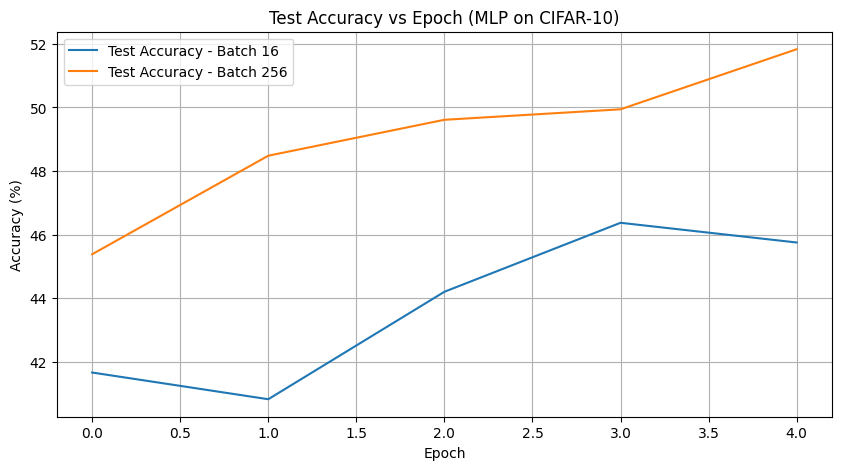

Training Time of small Batch 66.271832
Training Time of large Batch, 66.381942


In [9]:
# 📌 1. Import thư viện
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
# 📌 2. Dataset: CIFAR-10 (Flatten images)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

# 📌 3. Define MLP model
class MLP(nn.Module):
    def __init__(self, input_size=3072, hidden_size=512, num_classes=10):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# 📌 4. Training function
def train_model(batch_size, num_epochs=10):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # print(device)
    model = MLP().to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

    train_acc_list, test_acc_list = [], []

    for epoch in range(num_epochs):
        model.train()
        correct, total = 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        # Test accuracy
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        test_acc = 100 * correct / total
        test_acc_list.append(test_acc)

        print(f"[Batch {batch_size}] Epoch {epoch+1}/{num_epochs} - Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

    return train_acc_list, test_acc_list

# 📌 5. Train with small and large batch sizes
#startTime
start_small = time.time()
acc_small_batch = train_model(batch_size=64, num_epochs=5)
end_small = time.time()

#endTime
start_large = time.time()
acc_large_batch = train_model(batch_size=1028, num_epochs=5)
end_large = time.time()
# 📌 6. Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(acc_small_batch[1], label='Test Accuracy - Batch 16')
plt.plot(acc_large_batch[1], label='Test Accuracy - Batch 256')
plt.title("Test Accuracy vs Epoch (MLP on CIFAR-10)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

print(f'Training Time of small Batch {end_small - start_small:.6f}')
print(f'Training Time of large Batch, {end_large - start_large:.6f}')